In [3]:
!wget -O ChurnData.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/ChurnData.csv

--2024-01-13 12:57:33--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/ChurnData.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35943 (35K) [text/csv]
Saving to: ‘ChurnData.csv’

ChurnData.csv       100%[===================>]  35.10K  --.-KB/s    in 0.03s   

2024-01-13 12:57:33 (1.02 MB/s) - ‘ChurnData.csv’ saved [35943/35943]



In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn.metrics import classification_report,confusion_matrix,jaccard_score,ConfusionMatrixDisplay,log_loss

from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import LogisticRegression


In [122]:
df = pd.read_csv("ChurnData.csv")

In [6]:
df

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,55.0,44.0,24.0,83.0,1.0,23.0,0.0,1.0,0.0,17.35,...,0.0,0.0,0.0,1.0,0.0,2.854,3.199,4.419,3.0,0.0
196,34.0,23.0,3.0,24.0,1.0,7.0,0.0,1.0,0.0,6.00,...,0.0,0.0,1.0,1.0,0.0,1.792,3.332,3.178,3.0,0.0
197,6.0,32.0,10.0,47.0,1.0,10.0,0.0,1.0,0.0,3.85,...,0.0,0.0,1.0,1.0,0.0,1.348,3.168,3.850,3.0,0.0
198,24.0,30.0,0.0,25.0,4.0,5.0,0.0,1.0,1.0,8.70,...,1.0,1.0,1.0,1.0,1.0,2.163,3.866,3.219,4.0,1.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tenure    200 non-null    float64
 1   age       200 non-null    float64
 2   address   200 non-null    float64
 3   income    200 non-null    float64
 4   ed        200 non-null    float64
 5   employ    200 non-null    float64
 6   equip     200 non-null    float64
 7   callcard  200 non-null    float64
 8   wireless  200 non-null    float64
 9   longmon   200 non-null    float64
 10  tollmon   200 non-null    float64
 11  equipmon  200 non-null    float64
 12  cardmon   200 non-null    float64
 13  wiremon   200 non-null    float64
 14  longten   200 non-null    float64
 15  tollten   200 non-null    float64
 16  cardten   200 non-null    float64
 17  voice     200 non-null    float64
 18  pager     200 non-null    float64
 19  internet  200 non-null    float64
 20  callwait  200 non-null    float6

In [8]:
df.nunique()

tenure       68
age          51
address      40
income      101
ed            5
employ       35
equip         2
callcard      2
wireless      2
longmon     157
tollmon      65
equipmon     82
cardmon      92
wiremon      57
longten     198
tollten      99
cardten     124
voice         2
pager         2
internet      2
callwait      2
confer        2
ebill         2
loglong     157
logtoll      65
lninc       101
custcat       4
churn         2
dtype: int64

In [9]:
df.isnull().sum()

tenure      0
age         0
address     0
income      0
ed          0
employ      0
equip       0
callcard    0
wireless    0
longmon     0
tollmon     0
equipmon    0
cardmon     0
wiremon     0
longten     0
tollten     0
cardten     0
voice       0
pager       0
internet    0
callwait    0
confer      0
ebill       0
loglong     0
logtoll     0
lninc       0
custcat     0
churn       0
dtype: int64

In [148]:
df = df.astype("int")

In [14]:
df.duplicated().sum()

0

In [15]:
df["churn"].value_counts()

0.0    142
1.0     58
Name: churn, dtype: int64

In [124]:
newdf = df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']].astype("int")
df.churn=df.churn.astype("int")

In [125]:
dropped = df.drop("churn",axis=1)
X =np.asarray(df[["tenure", "age", "address", "income", "ed", "employ","equip"]])
y=np.asarray(df["churn"])
y=y.astype("int")

In [149]:
dropped = df.drop("churn",axis=1)
X = dropped
y = df["churn"]

In [150]:
from sklearn import preprocessing
X = StandardScaler().fit(X).transform(X)
X[0:5]

array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.6961288 ,
        -0.58477841, -0.85972695,  0.64686916,  1.56469673, -0.74293968,
         0.44892536, -0.8076183 ,  0.06212192,  1.07246165, -0.71875717,
        -0.3616781 , -0.55973877,  1.54590766,  1.62368828, -0.88640526,
         1.0944415 ,  1.08347268, -0.88640526, -0.9275698 ,  0.23891934,
         0.6989263 ,  1.41630855],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061, -0.6433592 ,
        -1.14437497, -0.85972695, -1.54590766, -0.63910148, -0.23581362,
        -0.84574042, -0.8076183 , -0.96186573, -0.56452735, -0.38845461,
        -0.61967897, -0.69284258, -0.64686916, -0.61588176, -0.88640526,
        -0.91370804, -0.92295821, -0.88640526,  0.37886654,  0.23891934,
        -0.52726019, -1.36987221],
       [-0.57928917, -0.85594447, -0.261522  , -0.35227817, -1.42318853,
        -0.92053635, -0.85972695, -1.54590766, -0.63910148, -0.54008925,
        -0.84574042, -0.8076183 , -0.96186573, -0.5645

In [151]:
X_train ,X_test ,y_train ,y_test=train_test_split(X,y,random_state=818,test_size=0.2)

In [157]:
model = LogisticRegression(C=0.01,solver="liblinear").fit(X_train,y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.59      0.69        29
           1       0.40      0.73      0.52        11

    accuracy                           0.62        40
   macro avg       0.62      0.66      0.61        40
weighted avg       0.73      0.62      0.64        40



In [158]:
y_pred

array([1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1])

In [154]:
y_pre_proba=model.predict_proba(X_test)


In [155]:
y_pre_proba[:5]

array([[0.38291394, 0.61708606],
       [0.27033536, 0.72966464],
       [0.44458142, 0.55541858],
       [0.59500239, 0.40499761],
       [0.73577761, 0.26422239]])

In [160]:
log_loss(y_test,y_pre_proba) # out of samples error solved with normalization

0.6046179472368794

In [159]:
jaccard_score(y_test, y_pred)

0.34782608695652173

In [161]:
confusion_matrix(y_test, y_pred)

array([[17, 12],
       [ 3,  8]])

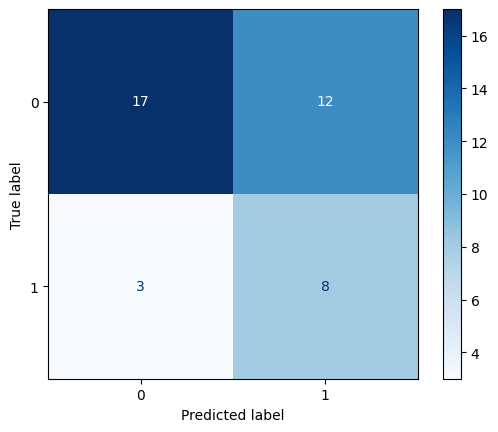

In [162]:
confusion_m = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_m, display_labels=model.classes_)
disp.plot(cmap='Blues')
